In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
from google.colab import files
uploaded = files.upload()
cancer = pd.read_csv('30-70cancerChdEtc.csv') 
cancer = pd.DataFrame(cancer)

Saving 30-70cancerChdEtc.csv to 30-70cancerChdEtc.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving co2.csv to co2.csv


In [4]:
co2 = pd.read_csv('co2.csv', encoding='latin1') 
co2 = pd.DataFrame(co2)

co2 = co2[(co2["Year"]<2017)&(co2["Year"]>1999)]
co2

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
250,Afghanistan,AF,93,2000,71679740.0,41128771.0,652230.0,0.40%,63/km²
251,Afghanistan,AF,93,2001,72477702.0,41128771.0,652230.0,0.40%,63/km²
252,Afghanistan,AF,93,2002,73529311.0,41128771.0,652230.0,0.40%,63/km²
253,Afghanistan,AF,93,2003,74715262.0,41128771.0,652230.0,0.40%,63/km²
254,Afghanistan,AF,93,2004,75604429.0,41128771.0,652230.0,0.40%,63/km²
...,...,...,...,...,...,...,...,...,...
59611,Zimbabwe,ZW,263,2012,689761713.0,16320537.0,390757.0,0.30%,42/km²
59612,Zimbabwe,ZW,263,2013,701597967.0,16320537.0,390757.0,0.30%,42/km²
59613,Zimbabwe,ZW,263,2014,713503654.0,16320537.0,390757.0,0.30%,42/km²
59614,Zimbabwe,ZW,263,2015,725729475.0,16320537.0,390757.0,0.30%,42/km²


In [17]:
co2 = co2.rename(columns={"Country": "Location"})
co2 = co2.rename(columns={"Year": "Period"})
pa = pd.concat( [cancer, co2],axis=0,ignore_index=True)
pa = pa.groupby(['Location', 'Period']).mean()
pa = pa.query("Period==2005 or Period==2000 or Period==2010 or Period==2015 or Period==2016")
pa.head(30)

First Tooltip  CO2 emission (Tons)  Population(2022)  \
Location    Period                                                         
Afghanistan 2000        34.366667         7.167974e+07        41128771.0   
            2005        34.066667         7.690770e+07        41128771.0   
            2010        31.733333         1.001490e+08        41128771.0   
            2015        29.833333         1.465925e+08        41128771.0   
            2016        29.766667         1.533371e+08        41128771.0   
Albania     2000        19.133333         1.966835e+08         2842321.0   
            2005        18.633333         2.161870e+08         2842321.0   
            2010        18.500000         2.368336e+08         2842321.0   
            2015        17.333333         2.615766e+08         2842321.0   
            2016        16.933333         2.660687e+08         2842321.0   
Algeria     2000        21.100000         2.113382e+09        44903225.0   
            2005        17.566667         2.571944e+09        44903225.0   
            2010        15.400000         3.127579e+09        44903225.0   
            2015        14.366667         3.800143e+09        44903225.0   
            2016        14.200000         3.949072e+09        44903225.0   
Andorra     2000              NaN         4.909760e+06           79824.0   
            2005              NaN         7.635776e+06           79824.0   
            2010              NaN         1.029218e+07           79824.0   
            2015              NaN         1.267378e+07           79824.0   
            2016              NaN         1.314277e+07           79824.0   
Angola      2000        24.000000         1.901396e+08        35588987.0   
            2005        21.333333         2.591042e+08        35588987.0   
            2010        18.166667         3.880989e+08        35588987.0   
            2015        16.933333         5.523754e+08        35588987.0   
            2016        16.566667         5.837792e+08        35588987.0   
Anguilla    2000              NaN         7.401280e+05               NaN   
            2005              NaN         1.282400e+06               NaN   
            2010              NaN         2.022528e+06               NaN   
            2015              NaN         2.718688e+06               NaN   
            2016              NaN         2.872576e+06               NaN   

                         Area  
Location    Period             
Afghanistan 2000     652230.0  
            2005     652230.0  
            2010     652230.0  
            2015     652230.0  
            2016     652230.0  
Albania     2000      28748.0  
            2005      28748.0  
            2010      28748.0  
            2015      28748.0  
            2016      28748.0  
Algeria     2000    2381741.0  
            2005    2381741.0  
            2010    2381741.0  
            2015    2381741.0  
            2016    2381741.0  
Andorra     2000        468.0  
            2005        468.0  
            2010        468.0  
            2015        468.0  
            2016        468.0  
Angola      2000    1246700.0  
            2005    1246700.0  
            2010    1246700.0  
            2015    1246700.0  
            2016    1246700.0  
Anguilla    2000         91.0  
            2005         91.0  
            2010         91.0  
            2015         91.0  
            2016         91.0

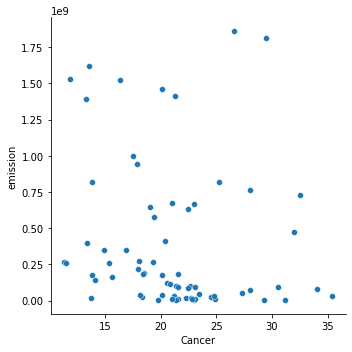

In [18]:
pa = pa.rename(columns={"CO2 emission (Tons)": "emission"})
pa = pa.rename(columns={"First Tooltip": "Cancer"})
pa_small = pa.query("emission< 0.20e10")
pa_big = pa.query("emission> 0.20e10")
sb.relplot(
    data=pa_small.sample(n=100),
    x="Cancer", y="emission", 
)

In [26]:
corr_pa = pa.corr()
corr_pa

,Cancer,emission,Population(2022),Area
Cancer,1.000000,-0.159941,0.025583,-0.080305
emission,-0.159941,1.000000,0.424151,0.579087
Population(2022),0.025583,0.424151,1.000000,0.443278
Area,-0.080305,0.579087,0.443278,1.000000


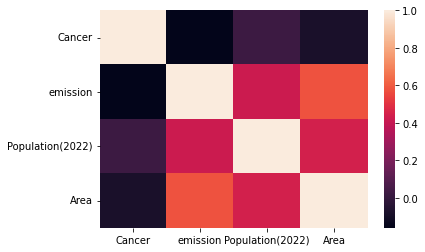

In [27]:
sb.heatmap(
    data=corr_pa,
)

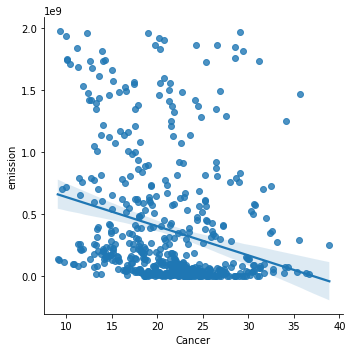

In [28]:
sb.lmplot(
    data=pa_small,
    x="Cancer", y="emission",
)

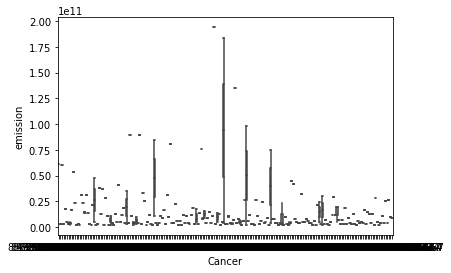

In [29]:
sb.boxplot(
    data=pa_big,
    x="Cancer", y="emission",
)

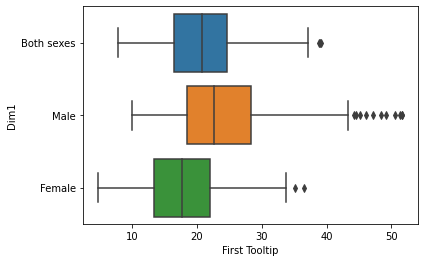

In [34]:
sb.boxplot(
    data=cancer,
    x="First Tooltip", y="Dim1",
)

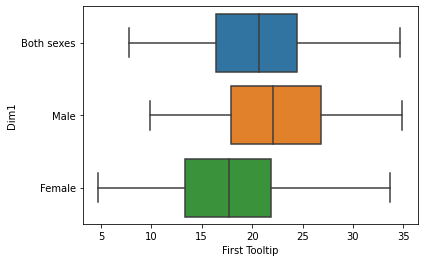

In [37]:
cancer2 = cancer[(cancer["First Tooltip"]<35)]
sb.boxplot(
    data=cancer2,
    x="First Tooltip", y="Dim1",
)

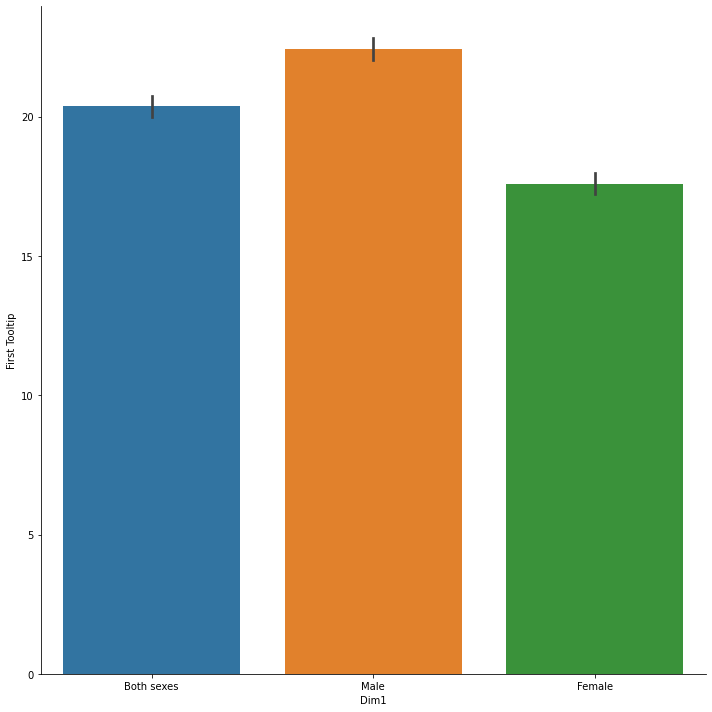

In [38]:
sb.catplot(
    data=cancer2,
    x="Dim1", y="First Tooltip", kind="bar", height=10 
)

In [40]:
cancer

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
1,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Male,31.8
2,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Female,27.7
3,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
4,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Male,31.9
...,...,...,...,...,...
2740,Zimbabwe,2005,Probability (%) of dying between age 30 and ex...,Male,22.1
2741,Zimbabwe,2005,Probability (%) of dying between age 30 and ex...,Female,22.9
2742,Zimbabwe,2000,Probability (%) of dying between age 30 and ex...,Both sexes,21.6
2743,Zimbabwe,2000,Probability (%) of dying between age 30 and ex...,Male,21.6


In [45]:
cancer_grp = cancer.groupby(['Dim1']).mean()
cancer_grp

,Period,First Tooltip
Dim1,,
Both sexes,2009.2,20.584918
Female,2009.2,17.639781
Male,2009.2,23.709727
